In [1]:
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

from IPython import display

# Interactive Tools
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, FloatSlider

np.set_printoptions(precision=4, suppress=True)

In [2]:
from vae.arch_surprise import VAE
vae = VAE()
vae.set_weights('./vae/weight/best/arch_surprise_v4.h5') #arch_surprise

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


In [3]:
EPISODE_NB = 1 # 5 for non-prioritised

DIR_NAME = './data/vae_food_prioritised/'
file = os.listdir(DIR_NAME)[EPISODE_NB]
print(file)

observations = np.load(DIR_NAME + file)['obs']
print(observations.shape)
size = observations.shape[0]

1001053853.npz
(1006, 64, 64, 3)


In [4]:
def animate_episode(observations):
    frames = vae.full_model.predict(observations)
    size = len(frames)
    
    for idx in range(size):
        plt.gca().cla() # clear axis

        plt.subplot(121)
        plt.imshow(observations[idx])
        plt.subplot(122)
        plt.imshow(frames[idx])

        display.clear_output(wait=True)
        display.display(plt.gcf()) 

KeyboardInterrupt: 

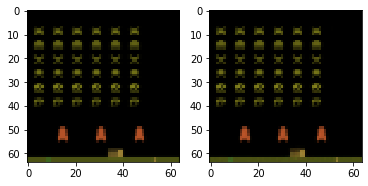

In [13]:
animate_episode(observations)

In [4]:
def slider_animation(observations):
    frames = vae.full_model.predict(observations)
    size = len(frames)

    @interact
    def animate(idx=(0, size - 1, 1)):
        plt.subplot(121)
        plt.imshow(observations[idx])
        plt.subplot(122)
        plt.imshow(frames[idx])
    
    return animate

In [5]:
slider_animation(observations);

interactive(children=(IntSlider(value=502, description='idx', max=1005), Output()), _dom_classes=('widget-inte…

In [11]:
def display(img, title=''):
    plt.figure()
    plt.title(f'{title} {img.shape}')
    plt.axis('off')
    
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)

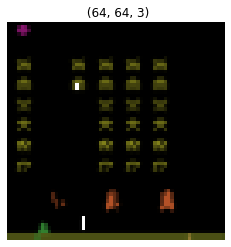

In [17]:
display(observations[672])

# Visualise Mean and Variance Vectors

In [8]:
'''
Inspect the values of mu (mean) and log_var (log variance) produced by an
encoder from a speicific observation
'''

mu_lv = vae.encoder_mu_log_var.predict(np.array([observations[200]])) # 200th observation

mu      = mu_lv[0][0]
log_var = mu_lv[1][0]

print('--- mu ---')
print(mu)
print()
print('--- log_var ---')
print(log_var)

--- mu ---
[-12.7389   3.2632   8.6771   5.5088   2.6572  13.9547  -3.4882  -0.8835
  -1.3841   3.9772  -2.3397   1.8439   0.1948   1.0612  -0.9958   8.8408
  11.5299  -3.5015  -6.1718  -6.3666   4.4871  -2.783    1.2665   5.2596
   1.885    6.1404   5.158   -2.4551  -1.3517   3.1643   4.6517   1.5583
  -2.5345 -11.8072  -0.9437  -8.7618  -7.1744  -8.6838   3.8142   6.4909
  15.2503   4.4769   6.4888  -4.8465   1.6721   0.0756  -1.0022   5.7668
  -3.5397   6.0031   8.5509  -0.0375  11.3234   5.0542  -6.416   13.3992
  -3.4671  -3.0417   7.809   -9.5932   2.6846   0.3973   7.9218  -2.1983]

--- log_var ---
[-7.4903 -6.9499 -6.9538 -7.454  -7.3302 -9.0409 -9.15   -7.5954 -7.3551
 -6.1699 -7.0982 -7.6933 -6.4102 -6.0466 -6.4268 -8.0517 -6.531  -7.3714
 -9.1218 -6.6548 -6.707  -6.9669 -7.6431 -6.642  -7.2942 -6.611  -6.4594
 -7.3587 -7.1376 -7.3845 -7.7588 -7.2804 -7.2762 -8.0483 -6.9469 -5.9545
 -7.1012 -7.1371 -7.3292 -6.1856 -7.3748 -8.136  -7.6987 -6.026  -7.0914
 -7.3184 -6.9283 -7.18

In [9]:
'''
Find indices of highest variance
'''
indices = np.argsort(-log_var)
print(indices.tolist())

[35, 43, 13, 9, 39, 59, 12, 14, 26, 16, 52, 25, 23, 19, 60, 20, 57, 51, 54, 48, 58, 46, 34, 1, 2, 21, 63, 44, 10, 36, 37, 28, 47, 32, 31, 24, 45, 38, 4, 8, 27, 17, 40, 61, 29, 3, 0, 56, 7, 22, 11, 42, 30, 49, 33, 15, 41, 55, 62, 53, 50, 5, 18, 6]


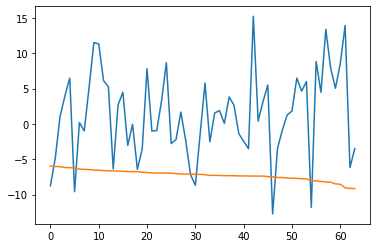

In [10]:
'''
Visualise differences in mean and variance across different latent variables
'''
plt.plot(mu[indices]); # BLUE
plt.plot(log_var[indices]); # ORANGE

In [11]:
# encoded_mu_log_var = vae.encoder_mu_log_var.predict(np.array([obs]))
# mu = encoded_mu_log_var[0][0]
# log_var = encoded_mu_log_var[1][0]

# lv = np.abs(log_var.copy())
# indices = np.argsort(lv)[-8:]
# print(indices)

def create_z_slider(frame_nb=100):
    obs = observations[frame_nb]
    sample = vae.encoder.predict(np.array([obs]))[0]
    log_var = vae.encoder_mu_log_var.predict(np.array([obs]))[1][0]

    indices = np.argsort(-log_var)[:8]
    print('Most significant components:', indices)
    c = (-100, 100, 20) # large step size to reduce lag on the slider

    @interact
    def z_slider(z0=c, z1=c, z2=c, z3=c, z4=c, z5=c, z6=c, z7=c): 
        
        z = sample.copy()
        
        z[indices[0]] = z0
        z[indices[1]] = z1
        z[indices[2]] = z2
        z[indices[3]] = z3
        z[indices[4]] = z4
        z[indices[5]] = z5
        z[indices[6]] = z6
        z[indices[7]] = z7
        
        image = vae.decoder.predict(np.array([z]))[0]
        plt.gca().cla()
        plt.imshow(image)
        
    return z_slider

In [12]:
create_z_slider();

Most significant components: [16  1  2 26 55 19 13 60]


interactive(children=(IntSlider(value=0, description='z0', min=-100, step=20), IntSlider(value=0, description=…